In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import lag_plot
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf 

In [2]:
Air = pd.read_csv("C:\\Users\\DELL\\Downloads\\Airlines+Data_new.csv", header=0, index_col=0,parse_dates=True)
Air

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121
...,...
Aug-02,405
Sep-02,355
Oct-02,306


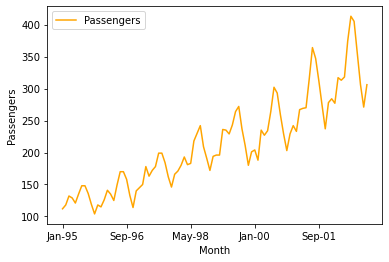

In [4]:
Air.plot(color="orange")
pyplot.xlabel('Month')
pyplot.ylabel('Passengers')
pyplot.show()

## Histogram and Density Plots

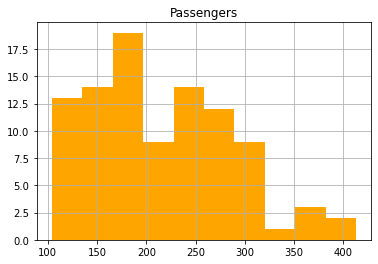

In [6]:
Air.hist(color="orange")
pyplot.show()

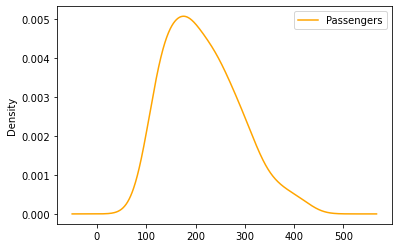

In [8]:
Air.plot(kind='kde',color="orange")
pyplot.show()

## Time series decomposition plot

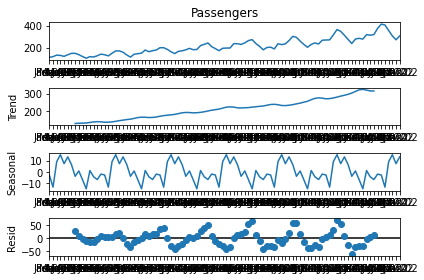

In [9]:
decompose_ts_add = seasonal_decompose(Air.Passengers,period=15)
decompose_ts_add.plot()
pyplot.show()

# ACF plots and PACF plots


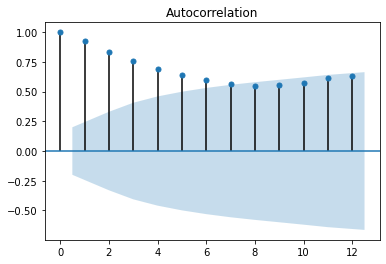

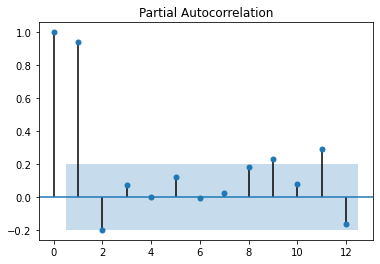

In [10]:
tsa_plots.plot_acf(Air.Passengers,lags=12)
tsa_plots.plot_pacf(Air.Passengers,lags=12)
pyplot.show()


In [11]:
Air_data= pd.read_csv("C:\\Users\\DELL\\Downloads\\Airlines+Data_new.csv")
Air_data

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [12]:
months =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
Air_data["months"]=0
p = Air_data['Month'][0]


In [13]:
for i in range(96):
    p = Air_data["Month"][i]
    Air_data['months'][i]= p[0:3]
    

<ipython-input-13-c59f1f4df01d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Air_data['months'][i]= p[0:3]
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
Air_data

,Month,Passengers,months
0,Jan-95,112,Jan
1,Feb-95,118,Feb
2,Mar-95,132,Mar
3,Apr-95,129,Apr
4,May-95,121,May
...,...,...,...
91,Aug-02,405,Aug
92,Sep-02,355,Sep
93,Oct-02,306,Oct
94,Nov-02,271,Nov


In [15]:
month_dummies = pd.DataFrame(pd.get_dummies(Air_data['months']))
Air_new = pd.concat([Air_data,month_dummies],axis = 1)
Air_new ["t"] = np.arange(1,97)
Air_new ["t_squared"] = Air_new ["t"]*Air_new ["t"]
Air_new ["log_Passengers"] = np.log(Air_new ["Passengers"])
Air_new 

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,Sep-02,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,Oct-02,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,Nov-02,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [17]:
Train = Air_new.head(75)
Test = Air_new.tail(21)
Test=Test.set_index(np.arange(1,22))

In [18]:
Train.head()

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [19]:
Test.head()

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
1,Apr-01,269,Apr,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711
2,May-01,270,May,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422
3,Jun-01,315,Jun,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573
4,Jul-01,364,Jul,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154
5,Aug-01,347,Aug,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,5.849325


## LINEAR

In [20]:
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

56.02331097092629

## Exponential

In [21]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

45.47042515863809

## Quadratic

In [22]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad


58.4911346866264

## Additive seasonality

In [23]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

131.17859681761576

## Additive Seasonality Quadratic

In [24]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

39.795561499549756

## Multiplicative Seasonality

In [25]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

136.42134858116125

## Multiplicative Additive Seasonality

In [26]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 


11.39529289764783

## Testing

In [27]:
Testing = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(Testing)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,56.023311
1,rmse_Exp,45.470425
2,rmse_Quad,58.491135
3,rmse_add_sea,131.178597
4,rmse_add_sea_quad,39.795561
5,rmse_Mult_sea,136.421349
6,rmse_Mult_add_sea,11.395293


## Multiplicative Additive Seasonality has the least rmse value (11.39) among the models.Thus consider this model for prediction.
 